In [1]:
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt

In [2]:
sym = 'BTCUSD'
engine = sqlalchemy.create_engine('sqlite:///'+sym+'stream.db')

df = pd.read_sql(sym+'_l2', engine)
df.sort_values('price', inplace = True)
df.reset_index(drop = True, inplace = True)
df

,side,price,volume
0,buy,0.01,149198.900000
1,buy,0.02,17167.000000
2,buy,0.03,6732.333333
3,buy,0.04,2221.500000
4,buy,0.05,12441.500000
...,...,...,...
10879,sell,948300.00,0.005171
10880,sell,949999.00,0.050000
10881,sell,956580.00,0.004414
10882,sell,999999.00,0.251749


In [3]:
def visualize(sym, max_pct_from_curr = 0.001):
    engine = sqlalchemy.create_engine('sqlite:///'+sym+'stream.db')
    while True:
        df = pd.read_sql(sym+'_l2', engine)
        df.sort_values('price', inplace = True)
        df.reset_index(drop = True, inplace = True)
        bid_idx = df[df['side']=='buy'].index[-1]
        ask_idx = bid_idx + 1

        bid = df.iloc[bid_idx, 1]
        ask = df.iloc[ask_idx, 1]
        mid = (bid+ask)/2
        df1 = df.query('price >'+str(bid*(1-max_pct_from_curr))).query('price <'+str(ask*(1+max_pct_from_curr)))
        
        colors = ['b' if x=='buy' else 'r' for x in df1['side'].to_list()]
        plt.bar(df1['price'], df1['volume'], color = colors)
        plt.vlines(mid, 0, 1)
        plt.show()

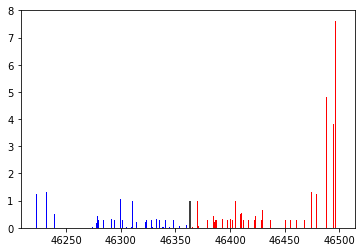

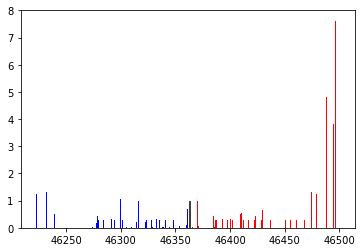

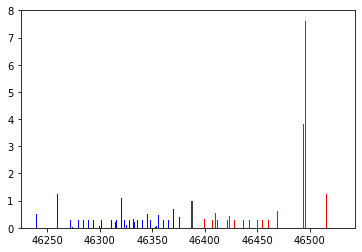

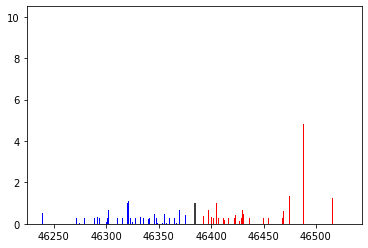

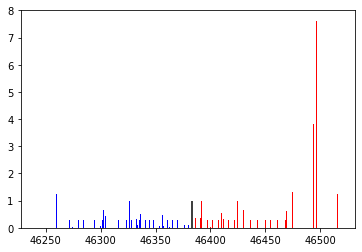

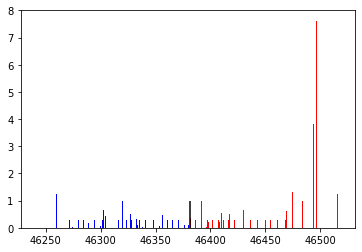

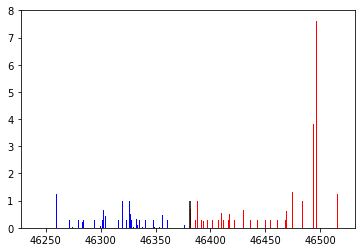

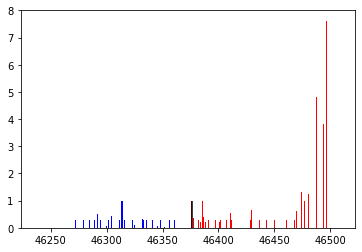

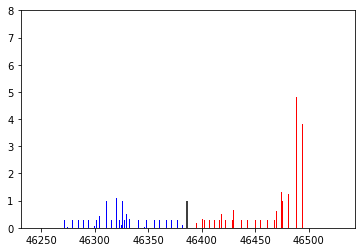

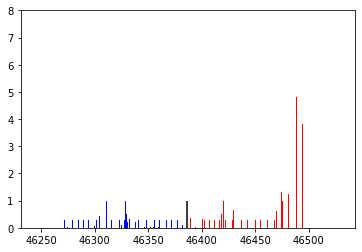

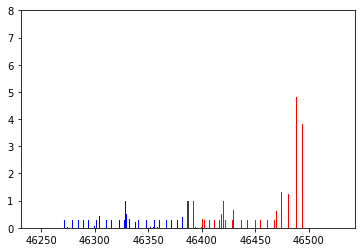

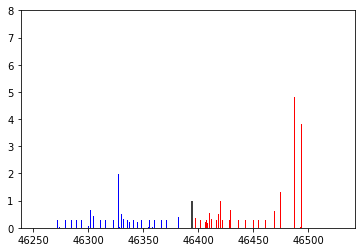

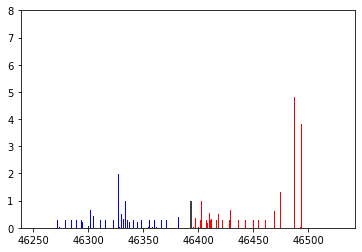

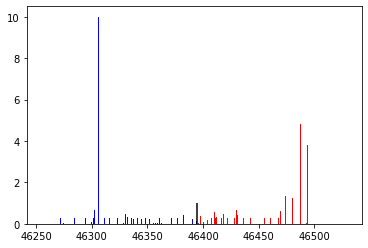

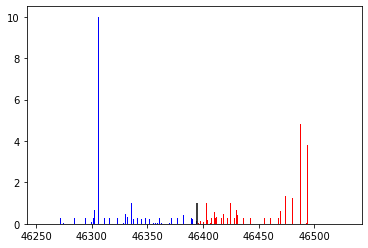

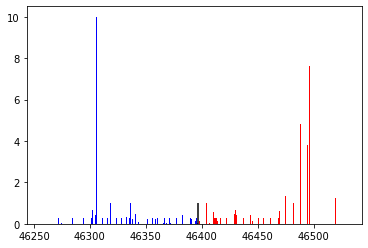

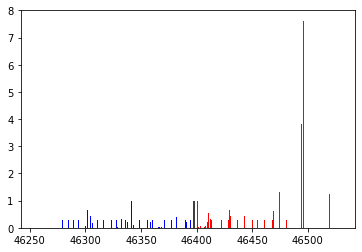

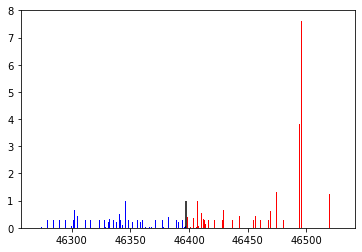

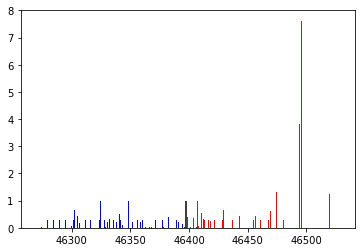

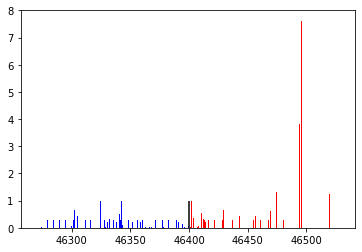

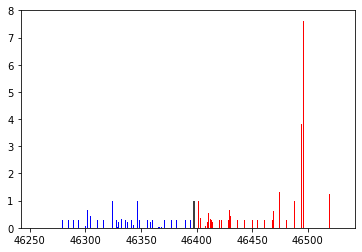

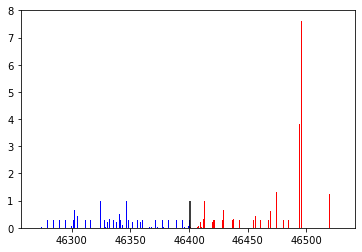

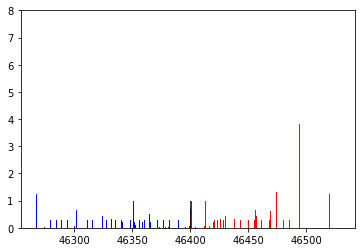

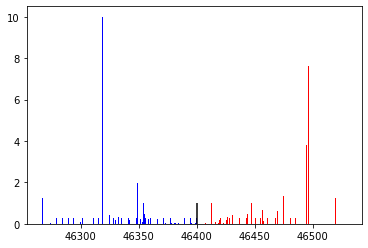

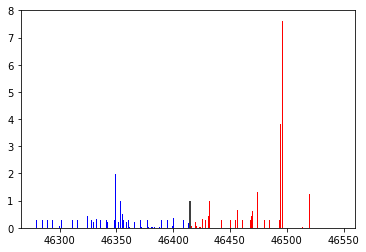

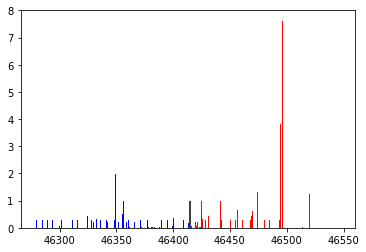

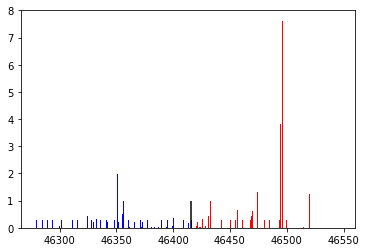

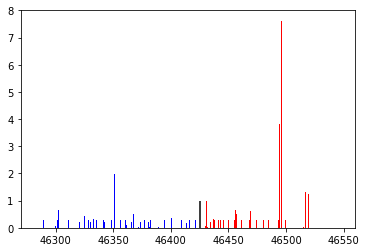

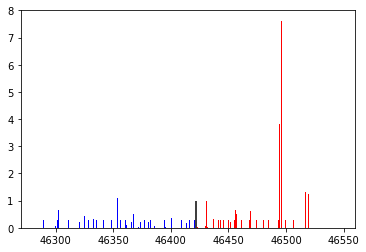

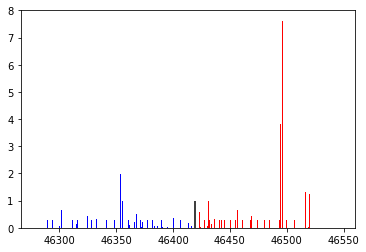

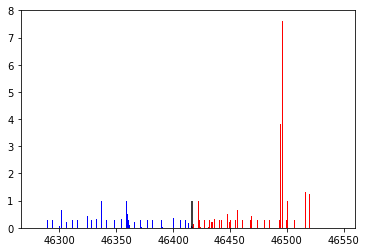

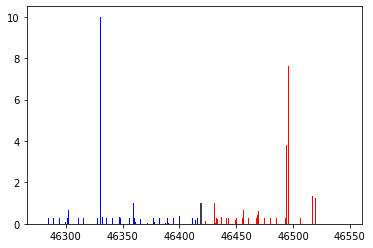

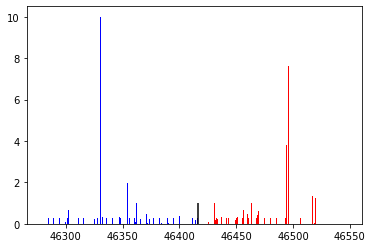

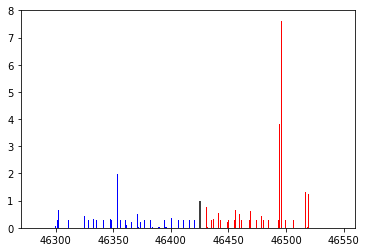

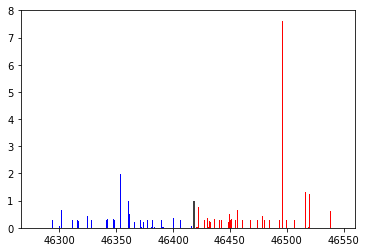

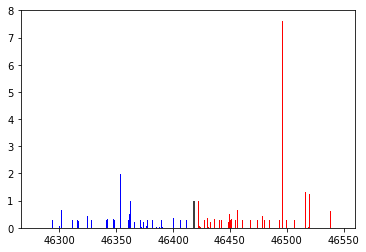

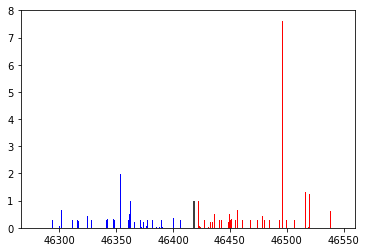

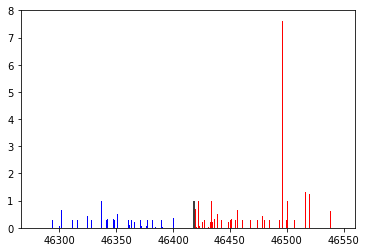

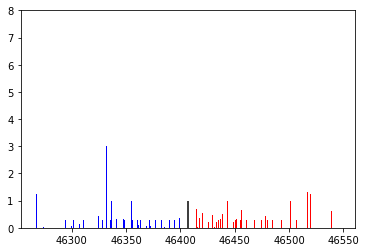

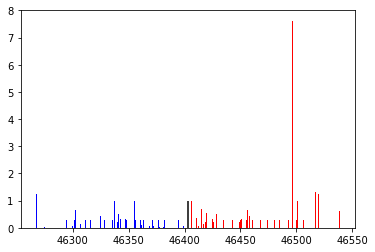

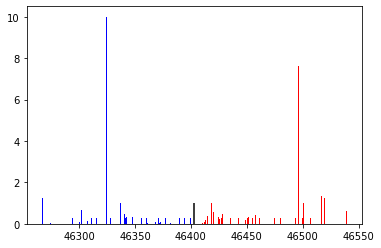

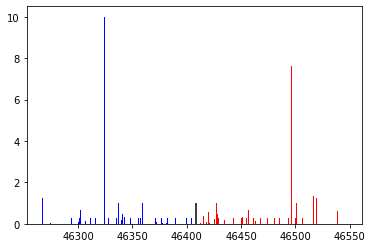

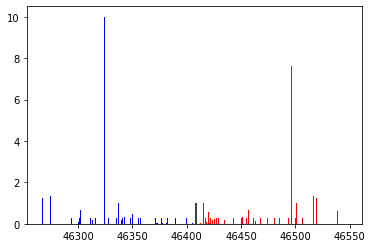

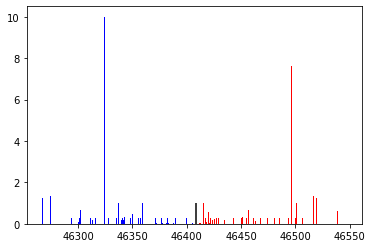

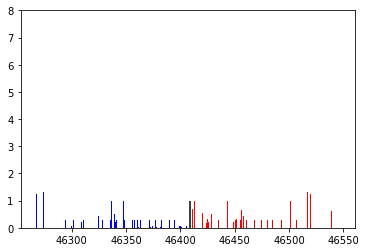

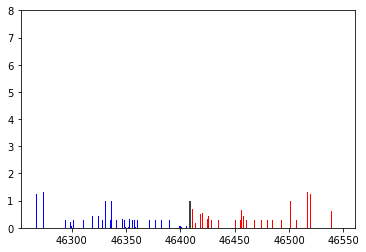

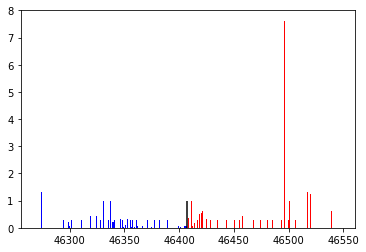

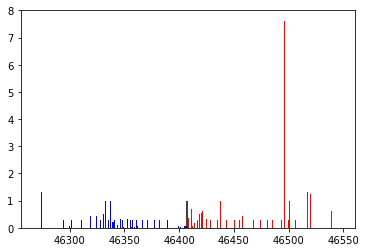

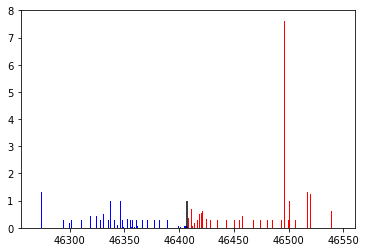

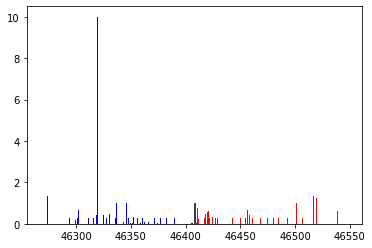

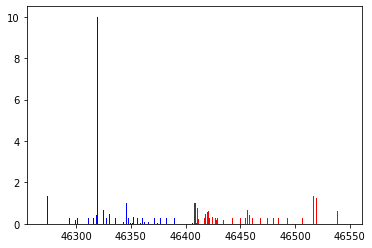

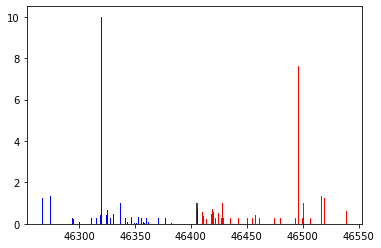

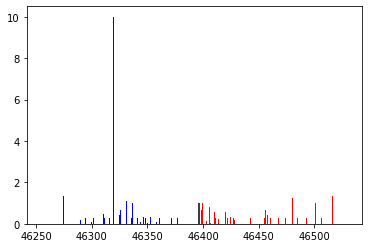

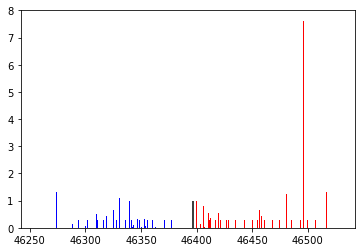

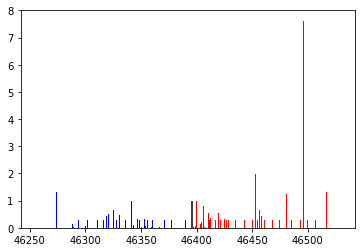

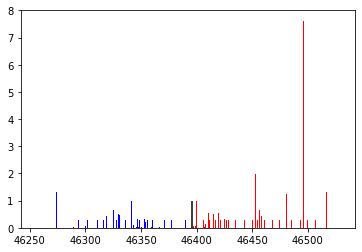

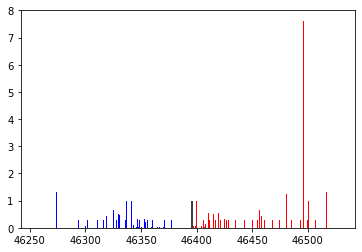

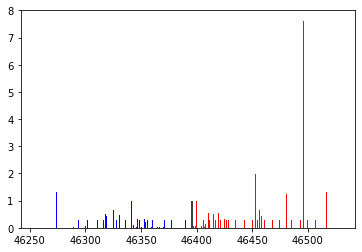

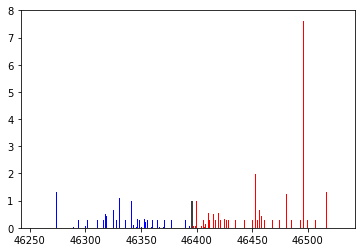

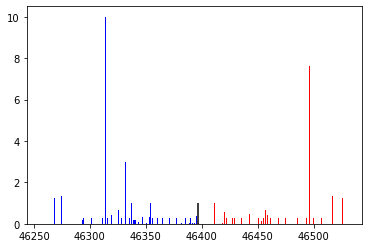

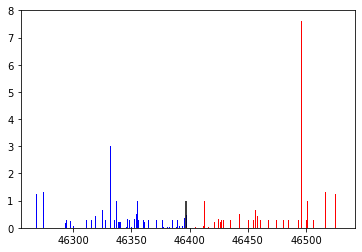

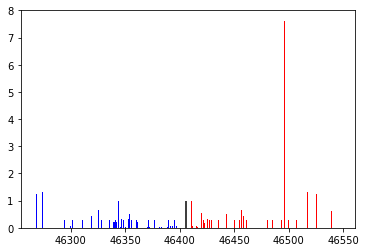

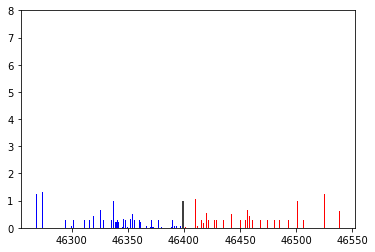

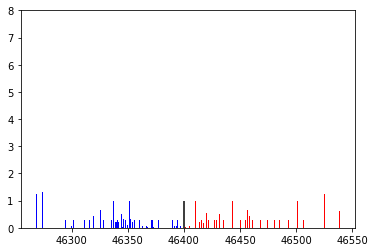

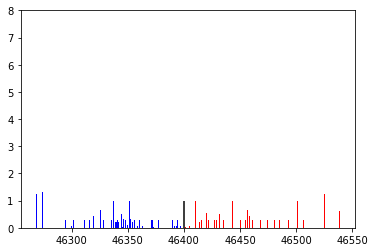

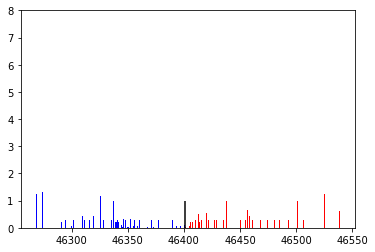

KeyboardInterrupt: 

In [14]:
visualize(sym, 0.003)

In [4]:
max_pct_from_curr = 0.003
while True:
    df = pd.read_sql(sym+'_l2', engine)
    df.sort_values('price', inplace = True)
    df.reset_index(drop = True, inplace = True)
    bid_idx = df[df['side']=='buy'].index[-1]
    ask_idx = bid_idx + 1

    bid = df.iloc[bid_idx, 1]
    ask = df.iloc[ask_idx, 1]
    mid = (bid+ask)/2
    df1 = df.query('price >'+str(bid*(1-max_pct_from_curr))).query('price <'+str(ask*(1+max_pct_from_curr)))

KeyboardInterrupt: 

In [5]:
df1 = df.query('price >'+str(bid*(1-max_pct_from_curr))).query('price <'+str(ask*(1+max_pct_from_curr)))
df1

,side,price,volume
8424,buy,46252.81,0.002789
8425,buy,46255.71,0.002250
8426,buy,46257.68,0.005524
8427,buy,46260.08,0.000432
8428,buy,46266.46,1.242330
...,...,...,...
8538,sell,46509.33,4.829988
8539,sell,46516.80,1.321800
8540,sell,46517.81,0.000106
8541,sell,46528.72,0.001883


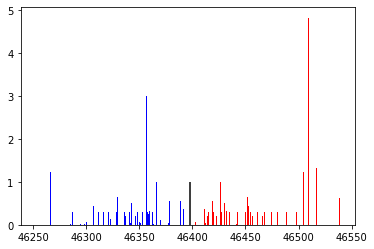

In [6]:
colors = ['b' if x=='buy' else 'r' for x in df1['side'].to_list()]
plt.bar(df1['price'], df1['volume'], color = colors)
plt.vlines(mid, 0, 1)
plt.show()